In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#biblioteca para a separação de dados em treino de teste
from sklearn.model_selection import train_test_split

# biblioteca para calcular a acuracia do modelo
from sklearn.metrics import accuracy_score

# algoritmo KNN
from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm



In [2]:
df_original = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data')

In [5]:
df_original.columns=['CLASS', 'ALCOHOL', 'MALICACID', 'ASH', 'ASHALCALINITY', 'MAGNESIUM', 'TOTALPHENOLS', 'FLAVONOTOS', 'NONFLAVONOIDSPHENOLS', 'PRONTHOCYANINS', 'COLORINTENSITY', 'HUE', 'OD280_PD315', 'PROLINE']

In [7]:
df_original.head()

,CLASS,ALCOHOL,MALICACID,ASH,ASHALCALINITY,MAGNESIUM,TOTALPHENOLS,FLAVONOTOS,NONFLAVONOIDSPHENOLS,PRONTHOCYANINS,COLORINTENSITY,HUE,OD280_PD315,PROLINE
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [8]:
df_original.describe()

,CLASS,ALCOHOL,MALICACID,ASH,ASHALCALINITY,MAGNESIUM,TOTALPHENOLS,FLAVONOTOS,NONFLAVONOIDSPHENOLS,PRONTHOCYANINS,COLORINTENSITY,HUE,OD280_PD315,PROLINE
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


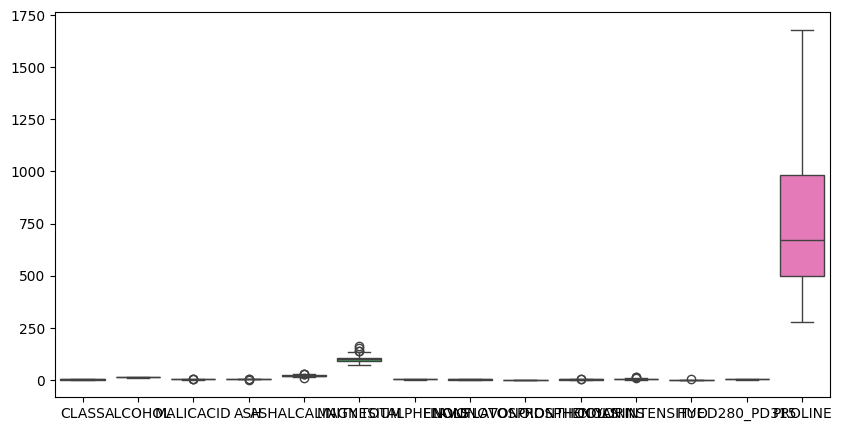

In [9]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(df_original) 

In [12]:
obj_padronizar = StandardScaler()

In [13]:
#aplicando a padronização
df_padronizado = obj_padronizar.fit_transform(df_original)

In [14]:
df_padronizado

array([[-1.22246766,  0.2558245 , -0.50162433, ...,  0.40709978,
         1.13169801,  0.97105248],
       [-1.22246766,  0.20622873,  0.01802001, ...,  0.3195674 ,
         0.80457911,  1.40099798],
       [-1.22246766,  1.70650069, -0.34931478, ..., -0.4244579 ,
         1.20281081,  2.34050852],
       ...,
       [ 1.36887097,  0.34261709,  1.73822194, ..., -1.60614514,
        -1.48525319,  0.28632445],
       [ 1.36887097,  0.21862767,  0.22408586, ..., -1.56237895,
        -1.39991783,  0.30224836],
       [ 1.36887097,  1.40892609,  1.57695301, ..., -1.51861275,
        -1.42836295, -0.58949046]])

In [16]:
df_padronizado = pd.DataFrame(df_padronizado, columns=df_original.columns)

df_padronizado.head()

,CLASS,ALCOHOL,MALICACID,ASH,ASHALCALINITY,MAGNESIUM,TOTALPHENOLS,FLAVONOTOS,NONFLAVONOIDSPHENOLS,PRONTHOCYANINS,COLORINTENSITY,HUE,OD280_PD315,PROLINE
0,-1.222468,0.255824,-0.501624,-0.824485,-2.500110,0.029180,0.572666,0.739636,-0.823139,-0.538575,-0.291130,0.407100,1.131698,0.971052
1,-1.222468,0.206229,0.018020,1.107690,-0.275639,0.099932,0.812784,1.221645,-0.501337,2.145975,0.269729,0.319567,0.804579,1.400998
2,-1.222468,1.706501,-0.349315,0.487935,-0.816726,0.948953,2.493609,1.472691,-0.984039,1.040572,1.184362,-0.424458,1.202811,2.340509
3,-1.222468,0.305420,0.224086,1.836812,0.445811,1.302712,0.812784,0.669343,0.222716,0.408913,-0.317016,0.363334,0.463238,-0.032154
4,-1.222468,1.495719,-0.519543,0.305655,-1.297693,0.878201,1.565153,1.372273,-0.179536,0.672104,0.731360,0.407100,0.349457,2.244965


In [17]:
df_padronizado.describe()

,CLASS,ALCOHOL,MALICACID,ASH,ASHALCALINITY,MAGNESIUM,TOTALPHENOLS,FLAVONOTOS,NONFLAVONOIDSPHENOLS,PRONTHOCYANINS,COLORINTENSITY,HUE,OD280_PD315,PROLINE
count,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02
mean,-8.028731e-17,-5.218675e-16,2.810056e-16,-3.813647e-16,-2.408619e-16,-8.028731e-17,-2.810056e-16,1.605746e-16,-6.021549e-16,-4.014366e-17,1.806465e-16,6.021549e-16,7.225858e-16,1.605746e-16
std,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00
min,-1.222468e+00,-2.434746e+00,-1.433400e+00,-3.668064e+00,-2.680472e+00,-2.093373e+00,-2.100648e+00,-1.690491e+00,-1.868993e+00,-2.065084e+00,-1.628565e+00,-2.087573e+00,-1.897707e+00,-1.487599e+00
25%,-1.222468e+00,-7.856866e-01,-6.628933e-01,-5.692924e-01,-6.964846e-01,-8.198411e-01,-8.840502e-01,-8.268924e-01,-7.426883e-01,-5.912136e-01,-7.959038e-01,-7.745875e-01,-9.590184e-01,-7.805774e-01
50%,7.320166e-02,6.984037e-02,-4.209899e-01,-2.245039e-02,-5.094986e-03,-1.123234e-01,9.242960e-02,1.069996e-01,-1.795360e-01,-6.483128e-02,-1.617011e-01,1.320404e-02,2.498992e-01,-2.327949e-01
75%,1.368871e+00,8.385748e-01,6.810145e-01,7.066723e-01,5.961134e-01,5.244425e-01,8.127835e-01,8.400546e-01,6.249672e-01,6.370119e-01,4.940731e-01,7.134631e-01,8.045791e-01,7.640417e-01
max,1.368871e+00,2.276852e+00,3.100048e+00,3.149233e+00,3.151249e+00,4.415790e+00,2.541633e+00,3.069345e+00,2.394874e+00,3.497023e+00,3.427800e+00,3.295669e+00,1.985052e+00,2.977465e+00


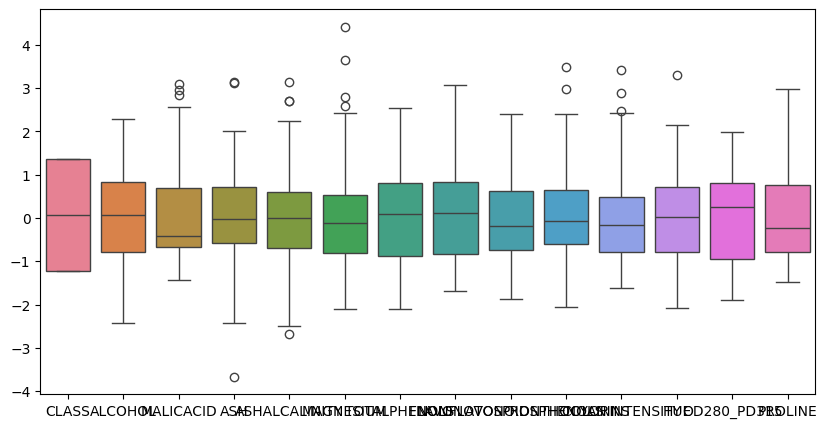

In [18]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(df_padronizado) 

- ## Algoritimo SVM

In [23]:
VAR_PREDITORAS_ORIG = df_original.drop('CLASS', axis=1)

In [24]:
VAR_TARGET = df_original['CLASS']

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(VAR_PREDITORAS_ORIG, VAR_TARGET, test_size = 0.3, random_state=10)

In [26]:
svm = svm.SVC(kernel='linear')
svm.fit(X_train, Y_train)

SVC(kernel='linear')

In [27]:
resultados = svm.predict(X_test)

In [29]:
score = accuracy_score(Y_test, resultados)

score

0.9074074074074074